In [36]:
import numpy as np
from numpy.random import RandomState
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib.font_manager as font_manager
from utils import add_font

In [37]:
style = 'barbie.mplstyle'
add_font('Bartex.ttf')

In [38]:
# Fixing random state for reproducibility
np.random.seed(19680801)

# Use hyphen instead of Unicode minus
rcParams['axes.unicode_minus'] = False

def plot_scatter(ax, prng, nb_samples=100):
    """Scatter plot."""
    for mu, sigma, marker in [(-.5, 0.75, 'o'), (0.75, 1., 's')]:
        x, y = prng.normal(loc=mu, scale=sigma, size=(2, nb_samples))
        ax.plot(x, y, ls='none', marker=marker)
    return ax


def plot_colored_lines(ax):
    """Plot lines with colors following the style color cycle."""
    t = np.linspace(-10, 10, 100)

    def sigmoid(t, t0):
        return 1 / (1 + np.exp(-(t - t0)))

    nb_colors = len(plt.rcParams['axes.prop_cycle'])
    shifts = np.linspace(-5, 5, nb_colors)
    amplitudes = np.linspace(1, 1.5, nb_colors)
    for t0, a in zip(shifts, amplitudes):
        ax.plot(t, a * sigmoid(t, t0), '-')
    ax.set_xlim(-10, 10)
    return ax


def plot_bar_graphs(ax, prng, min_value=5, max_value=25, nb_samples=5):
    """Plot two bar graphs side by side, with letters as x-tick labels."""
    x = np.arange(nb_samples)
    ya, yb = prng.randint(min_value, max_value, size=(2, nb_samples))
    width = 0.25
    ax.bar(x, ya, width)
    ax.bar(x + width, yb, width, color='C2')
    ax.set_xticks(x + width, labels=['a', 'b', 'c', 'd', 'e'])
    return ax


def plot_colored_circles(ax, prng, nb_samples=15):
    """
    Plot circle patches.

    NB: draws a fixed amount of samples, rather than using the length of
    the color cycle, because different styles may have different numbers
    of colors.
    """
    for sty_dict, j in zip(plt.rcParams['axes.prop_cycle'](),
                           range(nb_samples)):
        ax.add_patch(plt.Circle(prng.normal(scale=3, size=2),
                                radius=1.0, color=sty_dict['color']))

    ax.set_xlim([-4, 8])
    ax.set_ylim([-5, 6])
    ax.set_aspect('equal', adjustable='box')  # to plot circles as circles
    ax.set_xlabel('x label')
    ax.set_ylabel('y label')
    ax.set_title('Title')
    return ax


def plot_histograms(ax, prng, nb_samples=10000):
    """Plot 4 histograms and a text annotation."""
    params = ((10, 10), (4, 12), (50, 12), (6, 55))
    for a, b in params:
        values = prng.beta(a, b, size=nb_samples)
        ax.hist(values, histtype="stepfilled", bins=30,
                alpha=0.8, density=True)
    return ax


def plot_figure(style_label=""):
    """Setup and plot the demonstration figure with a given style."""
    # Use a dedicated RandomState instance to draw the same "random" values
    # across the different figures.
    prng = RandomState(96917002)

    fig, axs = plt.subplots(ncols=5, nrows=1, num=style_label,
                            figsize=(14.8, 2.8), layout='constrained')
    fig.suptitle('Barbie-fied plots', x=0.01, ha='left', color='#d74ea2',
                 fontsize=14)

    plot_scatter(axs[0], prng)
    plot_bar_graphs(axs[1], prng)
    plot_colored_lines(axs[2])
    plot_histograms(axs[3], prng)
    plot_colored_circles(axs[4], prng)

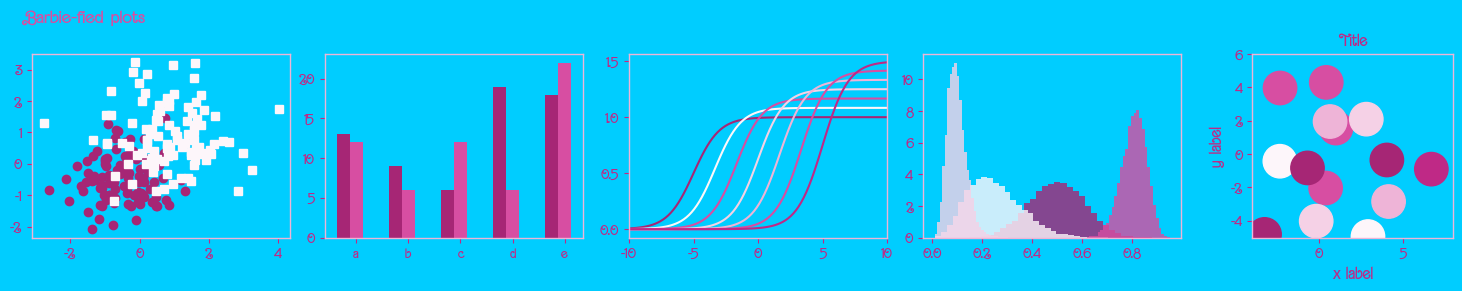

In [39]:
# Plot a demonstration figure for th specified style.
with plt.style.context(style):
    plot_figure(style_label=style)

plt.show()

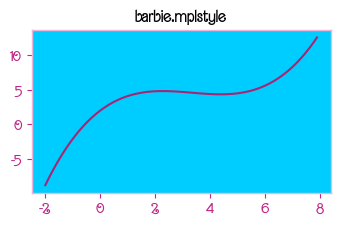

In [40]:
x = np.arange(-2, 8, .1)
y = .1 * x ** 3 - x ** 2 + 3 * x + 2

fig = plt.figure(dpi=100, figsize=(10, 20), tight_layout=True)
with plt.style.context(style):
    ax = fig.add_subplot(10, 3, i + 1)
    ax.plot(x, y)
ax.set_title(style)
plt.show()

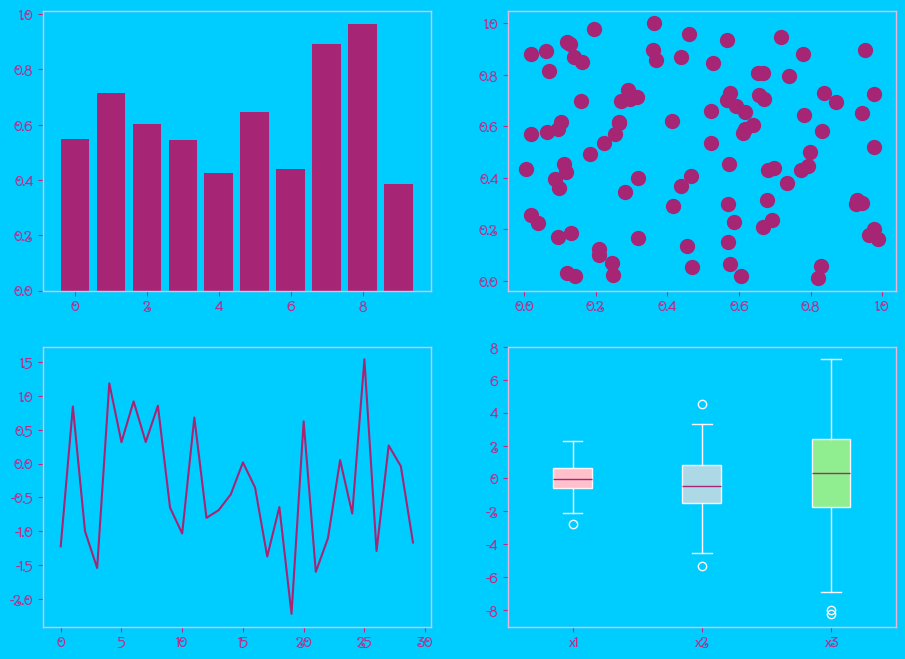

In [41]:
def create_subplots():
    """
    Creates a 2x2 grid of subplots with different types of plots.
    """
    np.random.seed(0)
    fig, ax = plt.subplots(2, 2, figsize=(11, 8))
    
    # Bar plot
    x = np.arange(10)
    y = np.random.rand(10)
    ax[0, 0].bar(x, y)

    # Scatter plot
    x = np.random.rand(100)
    y = np.random.rand(100)
    ax[0, 1].scatter(x, y, s=100)

    # Line plot
    ax[1, 0].plot(np.random.randn(30))

    # Boxplot
    data = [np.random.normal(0, std, size=100) for std in range(1, 4)]
    labels = ['x1', 'x2', 'x3']
    bplot1 = ax[1, 1].boxplot(data,
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks

    colors = ['pink', 'lightblue', 'lightgreen']
    for patch, color in zip(bplot1['boxes'], colors):
        patch.set_facecolor(color)

with plt.style.context(style):
    create_subplots()
plt.show()